In [2]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp
import tensorflow as tf
import deepface

2023-04-27 14:58:33.237232: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/robdres/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-04-27 14:58:33.237270: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [95]:
happyFaces.head()

NameError: name 'happyFaces' is not defined

In [5]:
happyFaces =  pd.DataFrame(columns = np.arange(205))
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh
for root, dirs, files in os.walk("./Happy Faces"):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.bmp'):
            image = root + "/"+ file
            face_obj = DeepFace.extract_faces(img_path = image,enforce_detection=False,detector_backend="mtcnn")
            img = np.array((face_obj[0]["face"]*255).astype(np.uint8))
            # For static images:
            with mp_face_mesh.FaceMesh(
                static_image_mode=True,
                max_num_faces=1,
                refine_landmarks=True,
                min_detection_confidence=0.5) as face_mesh:
                results = face_mesh.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
                for face_landmarks in results.multi_face_landmarks:
                    points = [0,1,2,4,5,6,8,9,10,17,152,362,386,263,374,473,33,145,155,159,468,55,107,53,63,70,285,283,300,334,336,10,338,284,389,447,366,288,397,365,379,400,152,176,150,172,58,132,227,34,162,21,103,109,61,37,267,291,405,17,181,419,363,439,459,239,219,134,196,13,14]
                    points = set(points)
                    selectedPoints = [face_landmarks.landmark[i] for i in points]
            points = np.array([[selectedPoints[i].x,selectedPoints[i].y,selectedPoints[i].z] for i in range(len(selectedPoints))])
            obj = list(points.reshape(204))
            obj.append(1)
            aux = pd.DataFrame(np.array(obj).reshape((1,205)))
            happyFaces= pd.concat([happyFaces, aux])


2023-04-14 01:35:48.211882: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/robdres/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-04-14 01:35:48.211913: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-14 01:35:48.211934: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (robdres): /proc/driver/nvidia/version does not exist
2023-04-14 01:35:48.212532: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
INFO: Created TensorFlow Lite 

KeyboardInterrupt: 

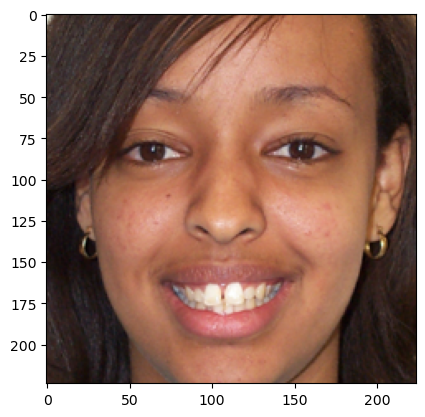

(224, 224, 3)


In [2]:
from deepface import DeepFace
import matplotlib.pyplot as plt
face_objs = DeepFace.extract_faces(img_path = "Happy Faces/Color_age_18-29_Happy_bmp/EMBfemale20happy.bmp")
for face_obj in face_objs:
    img = (face_obj["face"]*255).astype(int)
    
    plt.imshow(img)
    plt.show()
print(img.shape)

In [15]:
!pwdangelina

/home/robdres/codeTESIS/data


In [3]:
happyFaces

NameError: name 'happyFaces' is not defined

In [60]:
happyFaces.to_csv("happyFaces.csv")

In [67]:
sadFaces =  pd.DataFrame(columns = np.arange(205))
for root, dirs, files in os.walk("./Neutral Faces"):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.bmp'):
            #print(root+file)
            image = root + "/"+ file
            face_obj = DeepFace.extract_faces(img_path = image,enforce_detection=False,detector_backend="mtcnn")
            img = np.array((face_obj[0]["face"]*255).astype(np.uint8))
            # For static images:
            with mp_face_mesh.FaceMesh(
                static_image_mode=True,
                max_num_faces=1,
                refine_landmarks=True,
                min_detection_confidence=0.5) as face_mesh:
                
                results = face_mesh.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
                if not results.multi_face_landmarks:
                    continue
                for face_landmarks in results.multi_face_landmarks:
                    points = [0,1,2,4,5,6,8,9,10,17,152,362,386,263,374,473,33,145,155,159,468,55,107,53,63,70,285,283,300,334,336,10,338,284,389,447,366,288,397,365,379,400,152,176,150,172,58,132,227,34,162,21,103,109,61,37,267,291,405,17,181,419,363,439,459,239,219,134,196,13,14]
                    points = set(points)
                    selectedPoints = [face_landmarks.landmark[i] for i in points]
            points = np.array([[selectedPoints[i].x,selectedPoints[i].y,selectedPoints[i].z] for i in range(len(selectedPoints))])
            obj = list(points.reshape(204))
            obj.append(0)
            aux = pd.DataFrame(np.array(obj).reshape((1,205)))
            sadFaces= pd.concat([sadFaces, aux])


In [68]:
sadFaces

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
0,0.501716,0.736851,-0.109837,0.505987,0.614945,-0.178186,0.504613,0.654368,-0.099402,0.677356,...,0.451819,0.61699,-0.143283,0.668198,0.418166,0.040448,0.732595,0.936869,0.099805,0.0
0,0.500003,0.713067,-0.124426,0.492776,0.560959,-0.166096,0.494781,0.612283,-0.103349,0.669584,...,0.445332,0.571249,-0.131615,0.66249,0.440641,0.051492,0.723784,0.931337,0.021879,0.0
0,0.459098,0.662714,-0.124205,0.457729,0.558378,-0.18649,0.459482,0.601559,-0.107636,0.668506,...,0.408115,0.562616,-0.145443,0.662189,0.410984,0.030266,0.69489,0.898495,0.063457,0.0
0,0.501083,0.706806,-0.128042,0.508401,0.588124,-0.18743,0.505401,0.633371,-0.109827,0.683482,...,0.456728,0.595059,-0.152032,0.675674,0.436027,0.053766,0.724094,0.93012,0.083095,0.0
0,0.511473,0.738136,-0.083765,0.523025,0.634462,-0.164496,0.520983,0.664294,-0.084847,0.68068,...,0.471965,0.633674,-0.131699,0.671424,0.444755,0.019598,0.72738,0.923452,0.129611,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.533323,0.769534,-0.115271,0.51778,0.5902,-0.17313,0.515737,0.631214,-0.102995,0.698425,...,0.466616,0.594151,-0.13982,0.689357,0.419098,0.048725,0.725617,0.927745,0.063202,0.0
0,0.500858,0.721075,-0.107318,0.503905,0.600031,-0.17177,0.50725,0.641107,-0.099323,0.71052,...,0.458312,0.603059,-0.136964,0.696942,0.41767,0.018512,0.714683,0.936577,0.084471,0.0
0,0.494305,0.709977,-0.123005,0.484821,0.56854,-0.167095,0.487516,0.613024,-0.1026,0.6698,...,0.438679,0.575757,-0.132156,0.657711,0.421357,0.046189,0.717705,0.906548,0.029219,0.0
0,0.497621,0.713908,-0.097774,0.496154,0.595541,-0.167682,0.499433,0.632808,-0.092781,0.686768,...,0.449168,0.596643,-0.13355,0.674749,0.399764,0.019242,0.726606,0.923385,0.099851,0.0


In [70]:
1474+517

1991

In [93]:
sadFaces.to_csv("neutralFaces.csv")

NameError: name 'sadFaces' is not defined

In [159]:
images = []
for root, dirs, files in os.walk("./Neutral Faces"):
    for file in files[0:10]:
        if file.endswith('.jpg') or file.endswith('.bmp'):
            #print(root+file)
            image = root + "/"+ file
            img = cv2.imread(image)
            images.append(img)

In [158]:
pos = sadFaces.iloc[0:10]

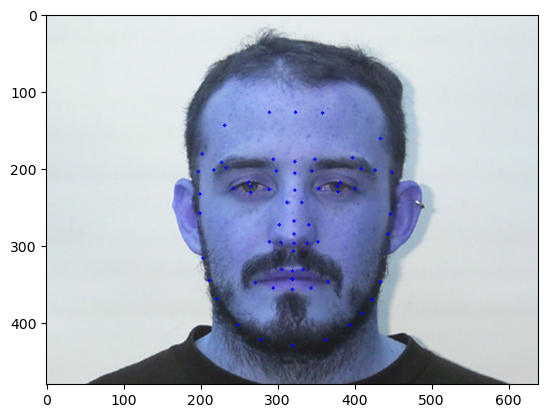

In [160]:
n = 4
posList = list(pos.iloc[n])[:-1]
posArray = np.array(posList).reshape(68,3)
annotated_image = images[n]
for x,y,z in posArray:
    cv2.circle(annotated_image,
                       (int(x*640),int(y*480)),
                       2,
                       (0,0,255),
                       -1
                    )
plt.imshow(annotated_image)

In [288]:
whole = pd.concat([happyFaces,sadFaces])

In [274]:
subsethappy = happyFaces.sample(n=100)
subsetneutral = sadFaces.sample(n=100)

In [275]:
wholeSample = pd.concat([subsethappy,subsetneutral])

In [283]:
print(sum(wholeSample.iloc[:,-1] ==0))
print(sum(wholeSample.iloc[:,-1] ==1))

100
100


In [285]:
wholeSample.sample()

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
0,0.504475,0.689525,-0.111531,0.509346,0.550729,-0.181965,0.50913,0.589195,-0.101428,0.699986,...,0.458784,0.553403,-0.145386,0.686499,0.385371,0.034949,0.736314,0.873594,0.103094,0.0


In [289]:
whole.to_csv("Faces.csv")
wholeSample.to_csv("Faces_subset.csv")
print(whole.shape)

(1991, 205)


In [224]:
import tensorflow as tf

# Load the dataset
df = pd.read_csv("Faces.csv")

# Split the dataset into features and labels
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

sample = df.sample(n = 200)
X_val = sample.iloc[:, 1:-1]
y_val = sample.iloc[:, -1]
# Define the neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(204,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=100,validation_data=(X_val,y_val))

Epoch 1/100
63/63 [==============================] - 1s 4ms/step - loss: 0.5812 - accuracy: 0.7308 - val_loss: 0.5294 - val_accuracy: 0.7700
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5692 - accuracy: 0.7403 - val_loss: 0.5297 - val_accuracy: 0.7700
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5573 - accuracy: 0.7408 - val_loss: 0.5103 - val_accuracy: 0.7700
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5430 - accuracy: 0.7403 - val_loss: 0.4770 - val_accuracy: 0.7700
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5306 - accuracy: 0.7423 - val_loss: 0.4625 - val_accuracy: 0.7700
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5201 - accuracy: 0.7509 - val_loss: 0.4382 - val_accuracy: 0.7750
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4873 - accuracy: 0.7680 - val_loss: 0.4026 - val_accuracy: 0.8050
Epoch 8/100
6

In [7]:
neutralFaces = pd.read_csv("neutralFaces.csv")
happyFaces = pd.read_csv("happyFaces.csv")

In [8]:
neutralFace = neutralFaces.iloc[0]
happyFace = happyFaces.iloc[0]

In [11]:

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

TypeError: Invalid shape (206,) for image data

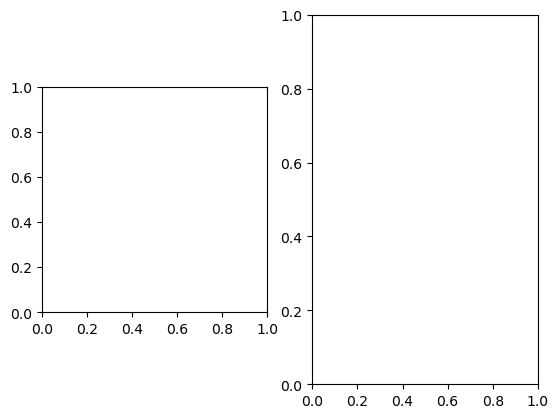

In [9]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(neutralFace)

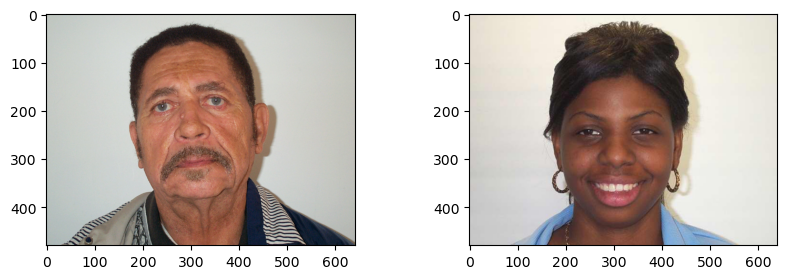

In [13]:
from deepface import DeepFace
import matplotlib.colors as mcolors
neutralFace = plt.imread("./Neutral Faces/Color_age_50-69_Neutral_bmp/male/JBmale68neutral.bmp")
happyFace = plt.imread("./Happy Faces/Color_Happy_jpg/EMBfemale21-4happy.jpg")

with plt.style.context("_classic_test_patch"):
    _,(ax1,ax2) = plt.subplots(1,2,figsize=(10,3))

    ax1.imshow(neutralFace)
    ax2.imshow(happyFace)

with mp_face_mesh.FaceMesh(
                static_image_mode=True,
                max_num_faces=1,
                refine_landmarks=True,
                min_detection_confidence=0.5) as face_mesh:
                results = face_mesh.process(cv2.cvtColor(neutralFace, cv2.COLOR_BGR2RGB)) 
                for face_landmarks in results.multi_face_landmarks:
                    points = [0,1,2,4,5,6,8,9,10,17,152,362,386,263,374,473,33,145,155,159,468,55,107,53,63,70,285,283,300,334,336,10,338,284,389,447,366,288,397,365,379,400,152,176,150,172,58,132,227,34,162,21,103,109,61,37,267,291,405,17,181,419,363,439,459,239,219,134,196,13,14]
                    points = set(points)
                    selectedPoints = [face_landmarks.landmark[i] for i in points]
                points = np.array([[selectedPoints[i].x,selectedPoints[i].y,selectedPoints[i].z] for i in range(len(selectedPoints))])

plt.savefig("firstImage.jpg")

114


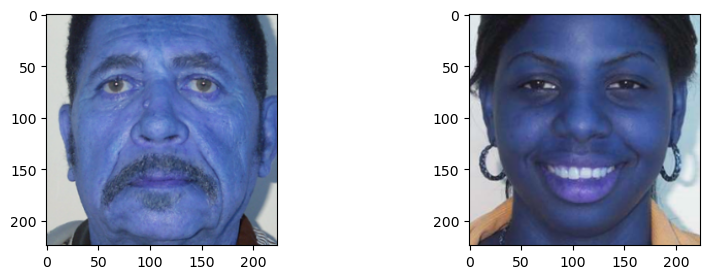

In [14]:
neutralFace = plt.imread("./Neutral Faces/Color_age_50-69_Neutral_bmp/male/JBmale68neutral.bmp")
happyFace = plt.imread("./Happy Faces/Color_Happy_jpg/EMBfemale21-4happy.jpg")
neutralFace1=DeepFace.extract_faces(neutralFace,detector_backend="dlib")[0]
happyFace1=DeepFace.extract_faces(happyFace,detector_backend="dlib")[0]
print(neutralFace1["facial_area"]["y"] + 2)
with plt.style.context("_classic_test_patch"):
    _,(ax1,ax2) = plt.subplots(1,2,figsize=(10,3))

    ax1.imshow(neutralFace1["face"])
    ax2.imshow(happyFace1["face"])
plt.savefig("secondImage.jpg")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


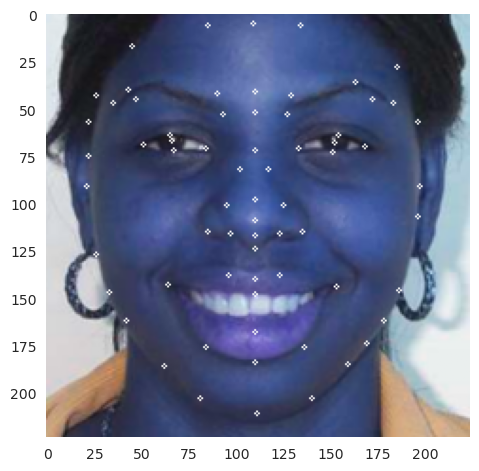

In [15]:
with mp_face_mesh.FaceMesh(
                static_image_mode=True,
                max_num_faces=1,
                refine_landmarks=True,
                min_detection_confidence=0.9) as face_mesh:
                results = face_mesh.process(cv2.cvtColor((happyFace1["face"]*255).astype(np.uint8), cv2.COLOR_BGR2RGB)) 
                happyFace2 = (happyFace1["face"]).copy()
                for face_landmarks in results.multi_face_landmarks:
                    points = [0,1,2,4,5,6,8,9,10,17,152,362,386,263,374,473,33,145,155,159,468,55,107,53,63,70,285,283,300,334,336,10,338,284,389,447,366,288,397,365,379,400,152,176,150,172,58,132,227,34,162,21,103,109,61,37,267,291,405,17,181,419,363,439,459,239,219,134,196,13,14]
                    points = set(points)
                    selectedPoints = [face_landmarks.landmark[i] for i in points]
                points = np.array([[selectedPoints[i].x,selectedPoints[i].y,selectedPoints[i].z] for i in range(len(selectedPoints))])
                for (x,y,z) in points:
                    cv2.circle(happyFace2,[int(x*224),int(y*224)],1,(255,255,255))
                    
                results = face_mesh.process(cv2.cvtColor((neutralFace1["face"]*255).astype(np.uint8), cv2.COLOR_BGR2RGB)) 
                neutralFace2 = (neutralFace1["face"]).copy()
                for face_landmarks in results.multi_face_landmarks:
                    points = [0,1,2,4,5,6,8,9,10,17,152,362,386,263,374,473,33,145,155,159,468,55,107,53,63,70,285,283,300,334,336,10,338,284,389,447,366,288,397,365,379,400,152,176,150,172,58,132,227,34,162,21,103,109,61,37,267,291,405,17,181,419,363,439,459,239,219,134,196,13,14]
                    points = set(points)
                    selectedPoints = [face_landmarks.landmark[i] for i in points]
                points = np.array([[selectedPoints[i].x,selectedPoints[i].y,selectedPoints[i].z] for i in range(len(selectedPoints))])
                for (x,y,z) in points:
                    cv2.circle(neutralFace2,[int(x*224),int(y*224)],int(2),(255,255,255))
    
with plt.style.context("seaborn"):
    #_,(ax1,ax2) = plt.subplots(1,2,figsize=(10,3))
    #ax1.grid(False)
    #ax2.grid(False)
    #ax1.imshow(neutralFace2)
    #ax2.imshow(happyFace2)
    
    plt.grid(False)
    plt.imshow(happyFace2)
plt.savefig("thirdImage.jpg")

In [16]:
from mlxtend.plotting import plot_confusion_matrix

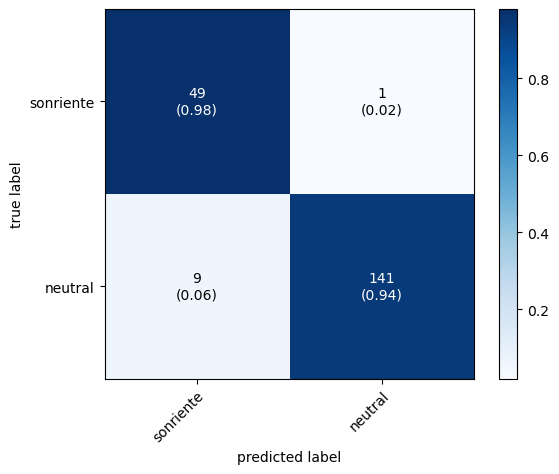

In [309]:
binary1 = np.array([[49, 1],
                    [9, 141]])

fig1, axis1 = plot_confusion_matrix(conf_mat=binary1,
                                class_names =["sonriente","neutral"],
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True) 

plt.savefig("confusion_matrix_3.jpg")
plt.show()

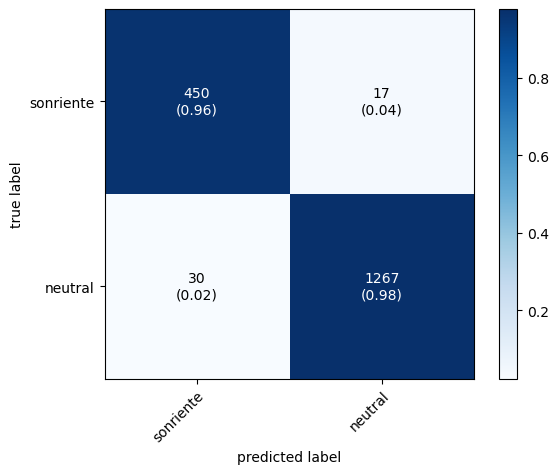

In [7]:
binary1 = np.array([[450, 17],
                    [30, 1267]])

fig, ax = plot_confusion_matrix(conf_mat=binary1,
                                class_names =["sonriente","neutral"],
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True) 

plt.savefig("confusion_matrix_3.jpg")
plt.show()


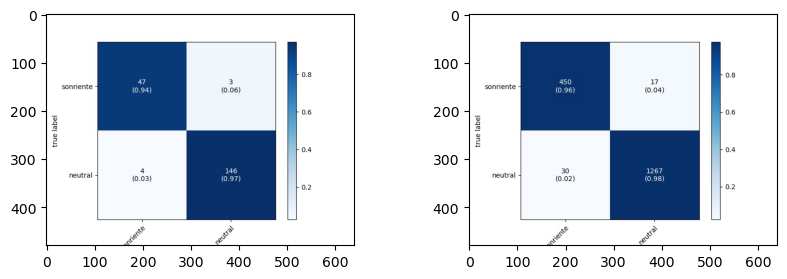

In [8]:
with plt.style.context("_classic_test_patch"):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,3))
    ax1.imshow(plt.imread("./confusion_matrix_1.jpg"))
    ax2.imshow(plt.imread("./confusion_matrix_2.jpg"))
plt.savefig("confussionMatrix3.jpg")

In [126]:
neutralFaces = pd.read_csv("neutralFaces.csv")
happyFaces = pd.read_csv("happyFaces.csv")

In [28]:
faces = pd.concat([happyFaces,neutralFaces])
faces = faces.iloc[:,1:]

val_points = pd.concat([happyFaces.sample(100).iloc[:,1:-1],neutralFaces.sample(100).iloc[:,1:-1]])
val_labels = pd.concat([happyFaces.sample(100).iloc[:,-1],neutralFaces.sample(100).iloc[:,-1]])
points = faces.iloc[:,:-1]
labels = faces.iloc[:,-1]

In [112]:
def build_discriminator(): 
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv1D(128, kernel_size=3, strides=1, padding='same', input_shape=(204,1)))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Dense(64));
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Dense(32));
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))    
    return model


In [17]:
# Adam is going to be the optimizer for both
from tensorflow.keras.optimizers import Adam
# Binary cross entropy is going to be the loss for both 
from tensorflow.keras.losses import BinaryCrossentropy
discriminator = build_discriminator()

NameError: name 'build_discriminator' is not defined

In [77]:
discriminator = build_discriminator()
d_opt = Adam(learning_rate=0.001) 
d_loss = BinaryCrossentropy()
discriminator.compile(d_opt,d_loss, metrics=['accuracy'])
hist = discriminator.fit(points,labels,epochs=100,validation_data=([val_points,val_labels]),verbose=2)

In [78]:
discriminator.compile(d_opt,d_loss, metrics=['accuracy'])

In [21]:
cromosomes = pd.read_csv("./Cromosomes.csv",header=None)

In [22]:
print(hist.history['accuracy'][-1])

NameError: name 'hist' is not defined

In [23]:
cromosomes.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,46,58,2,11,60,12,25,31,41,30,...,66,49,28,27,34,8,3,62,14,0.980942
1,10,31,52,1,4,16,5,45,18,20,...,23,7,2,22,30,56,21,39,58,0.981366
2,37,0,18,63,19,62,34,60,64,45,...,1,48,58,49,11,3,16,9,66,0.981559
3,19,62,41,57,53,31,40,22,45,37,...,48,63,54,0,46,28,55,27,17,0.982292
4,44,5,16,57,17,42,15,38,34,6,...,48,8,2,11,32,30,59,7,9,0.981482


In [24]:
cromosomes = cromosomes.iloc[:,:-1]

In [27]:
cromosomes.iloc[0:1].to_numpy()

array([[46, 58,  2, 11, 60, 12, 25, 31, 41, 30, 51, 24, 56, 26, 37, 48,
        52,  9, 63, 55,  5, 53, 19,  1, 35, 50, 38, 13, 42, 17, 47, 65,
        32, 61, 16, 45, 44, 57, 39, 66, 49, 28, 27, 34,  8,  3, 62, 14]])

In [29]:
chrom = points.iloc[:,np.array([(i*3,i*3+1,i*3+2) for i in cromosomes[1:2].to_numpy()[0]]).reshape(len(cromosomes[0:1].to_numpy()[0])*3,)]
val_chrom = val_points.iloc[:,np.array([(i*3,i*3+1,i*3+2) for i in cromosomes[1:2].to_numpy()[0]]).reshape(len(cromosomes[0:1].to_numpy()[0])*3,)]
chrom

,30,31,32,93,94,95,156,157,158,3,...,170,63,64,65,117,118,119,174,175,176
0,0.539235,0.139879,0.060612,0.299812,0.395012,0.054789,0.627517,0.249236,0.004896,0.560724,...,-0.116086,0.173734,0.290996,0.200131,0.416982,0.953297,-0.024711,0.267750,0.182052,0.115651
1,0.552925,0.141246,0.028623,0.290904,0.407450,0.044940,0.643334,0.290746,-0.017995,0.594727,...,-0.118675,0.169631,0.304768,0.192245,0.443322,0.972286,-0.016822,0.266080,0.191863,0.088430
2,0.517860,0.113890,-0.007985,0.267772,0.355070,0.064455,0.599593,0.247139,-0.047374,0.503919,...,-0.096302,0.193985,0.233962,0.212355,0.375909,0.899993,0.044049,0.261323,0.144471,0.089656
3,0.471893,0.134774,-0.064806,0.275568,0.426284,0.055854,0.558661,0.306444,-0.083821,0.478323,...,-0.078833,0.173005,0.291905,0.188573,0.398372,0.968274,0.089976,0.229711,0.189503,0.051243
4,0.518493,0.107370,-0.101824,0.265405,0.380398,0.014181,0.606859,0.295271,-0.103022,0.522286,...,-0.107665,0.145027,0.238997,0.132464,0.388258,0.973826,0.108802,0.232779,0.140933,-0.006698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,0.530080,0.128075,0.059476,0.275609,0.390197,0.085038,0.608263,0.280741,-0.003655,0.517780,...,-0.097942,0.175192,0.287838,0.249922,0.377346,0.974886,-0.031599,0.262442,0.173523,0.143204
1470,0.545442,0.111982,0.019638,0.290169,0.393558,0.082094,0.617339,0.249161,-0.029198,0.503905,...,-0.093934,0.214092,0.269044,0.239220,0.375548,0.970694,0.026644,0.291762,0.155954,0.122327
1471,0.493697,0.149763,0.087501,0.264113,0.410431,0.107153,0.581472,0.288150,0.011684,0.484821,...,-0.090293,0.175063,0.320615,0.285681,0.371293,0.949922,-0.042282,0.244636,0.206253,0.181536
1472,0.510059,0.120414,0.001542,0.274647,0.380850,0.069711,0.587163,0.271177,-0.043007,0.496154,...,-0.090340,0.190854,0.273279,0.218231,0.378010,0.974322,0.035358,0.264250,0.166238,0.099050


In [30]:
def build_discriminator(): 
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv1D(128, kernel_size=3, strides=1, padding='same', input_shape=(len(crosomes[0:1].to_numpy()[0])*3,1)))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Dense(64));
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Dense(32));
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Dropout(0.3))


    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))    
    return model

discriminator = build_discriminator()
d_opt = Adam(learning_rate=0.001) 
d_loss = BinaryCrossentropy()
discriminator.compile(d_opt,d_loss, metrics=['accuracy'])
hist = discriminator.fit(chrom,labels,epochs=50,validation_data=([val_chrom,val_labels]),verbose=0)

2023-04-26 22:51:15.616706: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/robdres/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-04-26 22:51:15.616751: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-26 22:51:15.616780: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (robdres): /proc/driver/nvidia/version does not exist
2023-04-26 22:51:15.617385: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


NameError: name 'crosomes' is not defined

In [33]:
import numpy as np 
results = np.load("results.npy")

In [34]:
np.sort(results[:,0][:,-1])

array([0.12106617, 0.12797768, 0.12838225, 0.13129446, 0.13160895,
       0.13320571, 0.13362128, 0.13468026, 0.13482599, 0.13569999,
       0.13603058, 0.13702925, 0.13724357, 0.13735317, 0.1374047 ,
       0.13783635, 0.13800937, 0.13809845, 0.13856977, 0.13877419,
       0.13909155, 0.13916983, 0.14065716, 0.1411714 , 0.14169696,
       0.14346784, 0.14399883, 0.14423199, 0.14427061, 0.14524554,
       0.14528769, 0.14637646, 0.14715151, 0.14734402, 0.14737813,
       0.1478122 , 0.14942044, 0.14981139, 0.14985825, 0.14997949,
       0.15064251, 0.15398516, 0.15448874, 0.1561394 , 0.16245441,
       0.16516331, 0.16939744, 0.17829107])

In [35]:
results[2][0]

array([0.78180659, 0.48130465, 0.39869845, 0.37003234, 0.32864654,
       0.32491863, 0.31743896, 0.29072875, 0.2809312 , 0.26722202,
       0.26532054, 0.25394368, 0.24748033, 0.25057542, 0.25392437,
       0.23860982, 0.23980461, 0.21852832, 0.21234024, 0.22377735,
       0.24189568, 0.22103034, 0.20685884, 0.21488112, 0.2019231 ,
       0.20811282, 0.21927086, 0.20573221, 0.21267912, 0.18986952,
       0.20139898, 0.2058406 , 0.20317866, 0.20158252, 0.18525258,
       0.19033365, 0.18676209, 0.18390037, 0.18998307, 0.1863054 ,
       0.19285415, 0.17593418, 0.18648723, 0.17311183, 0.18606111,
       0.16800177, 0.18030408, 0.17555636, 0.18303058, 0.17504649,
       0.19568205, 0.18961287, 0.17976499, 0.18842806, 0.19069795,
       0.16858889, 0.18470185, 0.18384886, 0.18766852, 0.17418046,
       0.16941665, 0.19349934, 0.18259697, 0.16528471, 0.16694964,
       0.16834788, 0.17544901, 0.15080391, 0.17316073, 0.17494406,
       0.1605944 , 0.15687972, 0.18029876, 0.16107807, 0.16554

In [36]:
result = [] 
for i in range(10):
    result.append(np.where((results[:,0][:,-1]) == np.sort(results[:,0][:,-1])[i])[0][0])
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


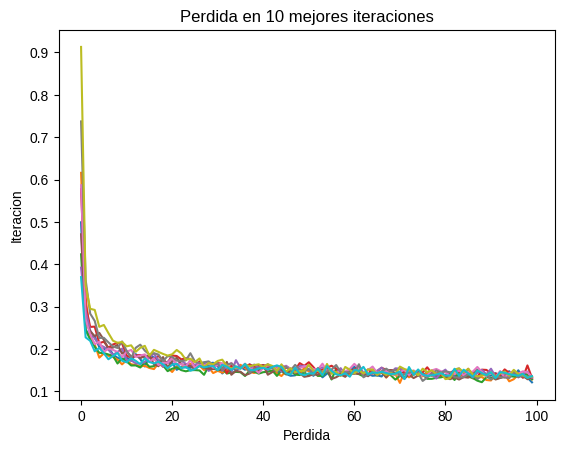

In [37]:
import matplotlib.pyplot as plt

plt.rcdefaults()

plt.grid(False)
for i in result:
    p = plt.plot(results[i][0])
    
plt.style.use('seaborn') 
plt.title("Perdida en 10 mejores iteraciones")
plt.xlabel("Perdida")
plt.ylabel("Iteracion")
plt.savefig("loss.jpg")

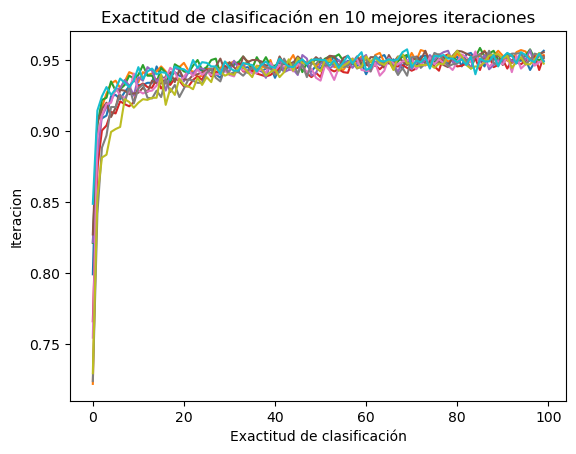

In [38]:
import matplotlib.pyplot as plt

    
plt.rcdefaults()
for i in result:
    p = plt.plot(results[i][1])
    
plt.rcdefaults()
plt.grid(False)
plt.title("Exactitud de clasificación en 10 mejores iteraciones")
plt.xlabel("Exactitud de clasificación")
plt.ylabel("Iteracion")
plt.savefig("exac.jpg")

In [7]:
import pandas as pd
data = pd.read_csv("Cromosomes.csv")
data = data.to_numpy()
data = data[:,:-1]

In [8]:
data1 = np.random.choice(data[1],size = 16,replace=False) 
data2 = np.random.choice(data[2],size = 29,replace=False) 
data3 = np.random.choice(data[3],size = 35,replace=False) 

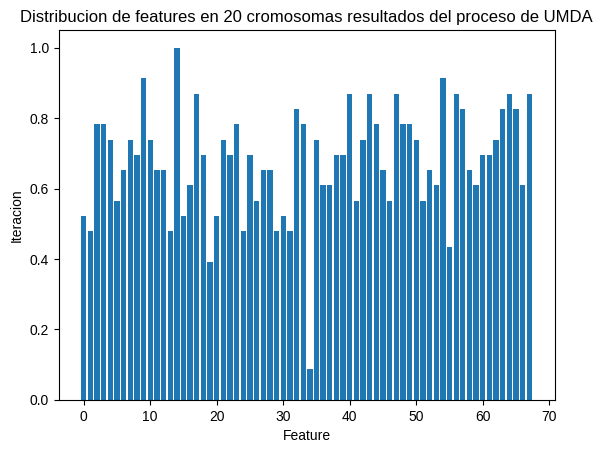

In [11]:
array = [0.3157894736842105, 0.2894736842105263, 0.47368421052631576, 0.47368421052631576, 0.4473684210526316, 0.34210526315789475, 0.39473684210526316, 0.4473684210526316, 0.42105263157894735, 0.5526315789473685, 0.4473684210526316, 0.39473684210526316, 0.39473684210526316, 0.2894736842105263, 0.6052631578947368, 0.3157894736842105, 0.3684210526315789, 0.5263157894736842, 0.42105263157894735, 0.23684210526315788, 0.3157894736842105, 0.4473684210526316, 0.42105263157894735, 0.47368421052631576, 0.2894736842105263, 0.42105263157894735, 0.34210526315789475, 0.39473684210526316, 0.39473684210526316, 0.2894736842105263, 0.3157894736842105, 0.2894736842105263, 0.5, 0.47368421052631576, 0.05263157894736842, 0.4473684210526316, 0.3684210526315789, 0.3684210526315789, 0.42105263157894735, 0.42105263157894735, 0.5263157894736842, 0.34210526315789475, 0.4473684210526316, 0.5263157894736842, 0.47368421052631576, 0.39473684210526316, 0.34210526315789475, 0.5263157894736842, 0.47368421052631576, 0.47368421052631576, 0.4473684210526316, 0.34210526315789475, 0.39473684210526316, 0.3684210526315789, 0.5526315789473685, 0.2631578947368421, 0.5263157894736842, 0.5, 0.39473684210526316, 0.3684210526315789, 0.42105263157894735, 0.42105263157894735, 0.4473684210526316, 0.5, 0.5263157894736842, 0.5, 0.3684210526315789, 0.5263157894736842]
array = np.array(array)
array = array/max(array)

plt.rcdefaults()
plt.bar(np.arange(0,68),array)
plt.grid(False)
plt.style.use('seaborn') 
plt.title("Distribucion de features en 20 cromosomas resultados del proceso de UMDA")
plt.xlabel("Feature")
plt.ylabel("Iteracion")
plt.savefig("distribution1.jpg")

In [12]:
array
# Compute min and max values of the array
min_value = np.min(array)
max_value = np.max(array)

# Transform the array
array = (array - min_value) / (max_value - min_value) * 0.8 + 0.2

array

array([0.58095238, 0.54285714, 0.80952381, 0.80952381, 0.77142857,
       0.61904762, 0.6952381 , 0.77142857, 0.73333333, 0.92380952,
       0.77142857, 0.6952381 , 0.6952381 , 0.54285714, 1.        ,
       0.58095238, 0.65714286, 0.88571429, 0.73333333, 0.46666667,
       0.58095238, 0.77142857, 0.73333333, 0.80952381, 0.54285714,
       0.73333333, 0.61904762, 0.6952381 , 0.6952381 , 0.54285714,
       0.58095238, 0.54285714, 0.84761905, 0.80952381, 0.2       ,
       0.77142857, 0.65714286, 0.65714286, 0.73333333, 0.73333333,
       0.88571429, 0.61904762, 0.77142857, 0.88571429, 0.80952381,
       0.6952381 , 0.61904762, 0.88571429, 0.80952381, 0.80952381,
       0.77142857, 0.61904762, 0.6952381 , 0.65714286, 0.92380952,
       0.5047619 , 0.88571429, 0.84761905, 0.6952381 , 0.65714286,
       0.73333333, 0.73333333, 0.77142857, 0.84761905, 0.88571429,
       0.84761905, 0.65714286, 0.88571429])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


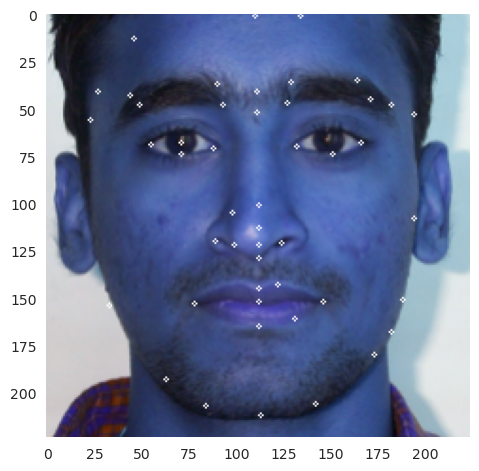

In [34]:
plt.rcdefaults()
from deepface import DeepFace
import matplotlib.colors as mcolors
    neutralFace = plt.imread("./Neutral Faces/Color_age_18-29_Neutral_bmp/male/EMImale21-2neutral.bmp")
happyFace = plt.imread("./Happy Faces/Color_age_18-29_Happy_bmp/EMBfemale20-2happy.bmp")
neutralFace1=DeepFace.extract_faces(neutralFace,detector_backend="dlib")[0]
happyFace1=DeepFace.extract_faces(happyFace,detector_backend="dlib")[0]

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh
def image_print(happyFace1):
    with mp_face_mesh.FaceMesh(
                    static_image_mode=True,
                    max_num_faces=1,
                    refine_landmarks=True,
                    min_detection_confidence=0.9) as face_mesh:
                    results = face_mesh.process(cv2.cvtColor((happyFace1["face"]*255).astype(np.uint8), cv2.COLOR_BGR2RGB)) 
                    happyFace2 = (happyFace1["face"]).copy()
                    for face_landmarks in results.multi_face_landmarks:
                        points = [0,1,2,4,5,6,8,9,10,17,152,362,386,263,374,473,33,145,155,159,468,55,107,53,63,70,285,283,300,334,336,10,338,284,389,447,366,288,397,365,379,400,152,176,150,172,58,132,227,34,162,21,103,109,61,37,267,291,405,17,181,419,363,439,459,239,219,134,196,13,14]
                        points = set(points)
                        selectedPoints = [face_landmarks.landmark[i] for i in points]
                    points = np.array([[selectedPoints[i].x,selectedPoints[i].y,selectedPoints[i].z] for i in range(len(selectedPoints))])
                    for i in range(len(points)):
                        if(i in data[0]):
                            cv2.circle(happyFace2,[int(points[i][0]*224),int(points[i][1]*224)],1,(255,255,255))

                    results = face_mesh.process(cv2.cvtColor((happyFace1["face"]*255).astype(np.uint8), cv2.COLOR_BGR2RGB)) 
                    neutralFace2 = (happyFace1["face"]).copy()
                    resized = cv2.resize(neutralFace2, (1000,1000), interpolation=cv2.INTER_LINEAR) 
                    for face_landmarks in results.multi_face_landmarks:
                        points = [0,1,2,4,5,6,8,9,10,17,152,362,386,263,374,473,33,145,155,159,468,55,107,53,63,70,285,283,300,334,336,10,338,284,389,447,366,288,397,365,379,400,152,176,150,172,58,132,227,34,162,21,103,109,61,37,267,291,405,17,181,419,363,439,459,239,219,134,196,13,14]
                        points = set(points)
                        selectedPoints = [face_landmarks.landmark[i] for i in points]
                    points = np.array([[selectedPoints[i].x,selectedPoints[i].y,selectedPoints[i].z] for i in range(len(selectedPoints))])
                    for i in range(len(points)):
                        cv2.putText(resized,str(round(array[i],2)),[int(points[i][0]*1000 -15),int(points[i][1]*1000+5)],cv2.FONT_HERSHEY_PLAIN,1.2,(255,255,255),1)
                        if(i in data[0]):
                            cv2.circle(resized,[int(points[i][0]*1000),int(points[i][1]*1000)],int(array[i]*40),(0,255,0))
                        else:
                            cv2.circle(resized,[int(points[i][0]*1000),int(points[i][1]*1000)],int(array[i]*40),(255,0,2))
                        #cv2.circle(resized,[int(points[i][0]*1000),int(points[i][1]*1000)],5,cv2.COLOR_YUV2GRAY_NV12)

    with plt.style.context("seaborn"):
        #_,(ax1,ax2) = plt.subplots(1,2,figsize=(10,3))
        #ax1.grid(False)
        #ax2.grid(False)
        plt.grid(False)
        plt.imshow(happyFace2)
        #ax2.imshow(happyFace2)

    plt.savefig("final_image_1.jpg")
image_print(neutralFace1)

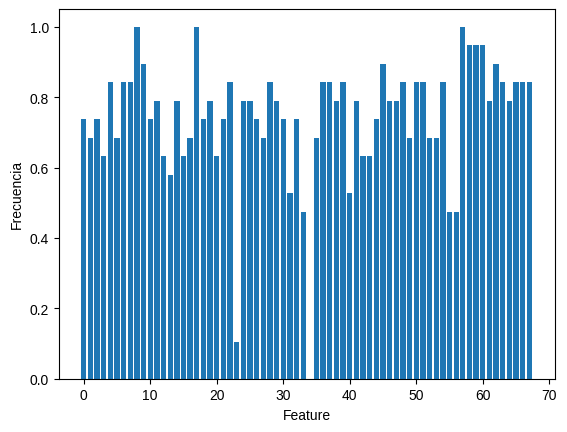

In [21]:
array = [0.3157894736842105, 0.2894736842105263, 0.47368421052631576, 0.47368421052631576, 0.4473684210526316, 0.34210526315789475, 0.39473684210526316, 0.4473684210526316, 0.42105263157894735, 0.5526315789473685, 0.4473684210526316, 0.39473684210526316, 0.39473684210526316, 0.2894736842105263, 0.6052631578947368, 0.3157894736842105, 0.3684210526315789, 0.5263157894736842, 0.42105263157894735, 0.23684210526315788, 0.3157894736842105, 0.4473684210526316, 0.42105263157894735, 0.47368421052631576, 0.2894736842105263, 0.42105263157894735, 0.34210526315789475, 0.39473684210526316, 0.39473684210526316, 0.2894736842105263, 0.3157894736842105, 0.2894736842105263, 0.5, 0.47368421052631576, 0.05263157894736842, 0.4473684210526316, 0.3684210526315789, 0.3684210526315789, 0.42105263157894735, 0.42105263157894735, 0.5263157894736842, 0.34210526315789475, 0.4473684210526316, 0.5263157894736842, 0.47368421052631576, 0.39473684210526316, 0.34210526315789475, 0.5263157894736842, 0.47368421052631576, 0.47368421052631576, 0.4473684210526316, 0.34210526315789475, 0.39473684210526316, 0.3684210526315789, 0.5526315789473685, 0.2631578947368421, 0.5263157894736842, 0.5, 0.39473684210526316, 0.3684210526315789, 0.42105263157894735, 0.42105263157894735, 0.4473684210526316, 0.5, 0.5263157894736842, 0.5, 0.3684210526315789, 0.5263157894736842]

array = [0.7, 0.65, 0.7, 0.6, 0.8, 0.65, 0.8, 0.8, 0.95, 0.85, 0.7, 0.75, 0.6, 0.55, 0.75, 0.6, 0.65, 0.95, 0.7, 0.75, 0.6, 0.7, 0.8, 0.1, 0.75, 0.75, 0.7, 0.65, 0.8, 0.75, 0.7, 0.5, 0.7, 0.45, 0.0, 0.65, 0.8, 0.8, 0.75, 0.8, 0.5, 0.75, 0.6, 0.6, 0.7, 0.85, 0.75, 0.75, 0.8, 0.65, 0.8, 0.8, 0.65, 0.65, 0.8, 0.45, 0.45, 0.95, 0.9, 0.9, 0.9, 0.75, 0.85, 0.8, 0.75, 0.8, 0.8, 0.8]

array = np.array(array)
array = array/max(array)
plt.bar(np.arange(0,68),array)
plt.style.use('seaborn') 
plt.xlabel("Feature")
plt.ylabel("Frecuencia")

plt.savefig("distribution1.jpg")

In [314]:
1- (68-42)/68

0.6176470588235294